# Support Vector Machine Exhibition

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

import from_scratch.split_data as split_data
import from_scratch.svm as svm


# 2D Data

[]

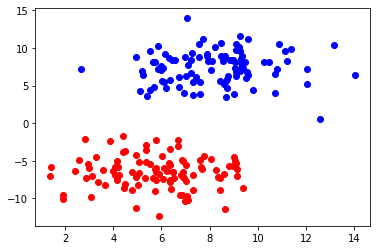

In [2]:
# Create data
TwoDFeatures, TwoDTargets = make_blobs(
    n_samples=200, n_features=2, centers=2, cluster_std=2)

ClassA = TwoDTargets == 0
TwoDTargets[ClassA] = -1
plt.scatter(TwoDFeatures[ClassA, 0], TwoDFeatures[ClassA, 1], color="red")

ClassB = TwoDTargets == 1
plt.scatter(TwoDFeatures[ClassB, 0], TwoDFeatures[ClassB, 1], color="blue")

plt.plot()


## From Scratch Implementation

In [3]:
# Add bias to features
TwoDFeatures_modded = np.hstack(
    (TwoDFeatures, np.ones((TwoDFeatures.shape[0], 1))))


In [4]:
# Train/test split
train_features, train_targets, test_features, test_targets = split_data.train_test_split(
    TwoDFeatures_modded.T, TwoDTargets.reshape(1, TwoDTargets.shape[0]))


In [5]:
# Train model
svm_model = svm.SVM(train_features.shape[0])
svm_model.fit(train_features, train_targets)


| epoch 1 | loss 43.404475023858296
| epoch 2 | loss 56.21201211363469
| epoch 4 | loss 43.41479940406277
| epoch 8 | loss 0.24152943607469085
| epoch 16 | loss 0.24091191117869507


In [6]:
# Test model
predictions = svm_model.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[1] * 100 :2.3f}%")


Accuray = 100.000%


[]

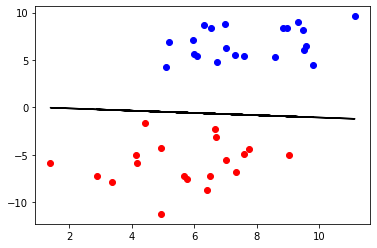

In [7]:
# Visualize model
line = svm_model.weights.T
w_0 = line[2]
w_1 = line[0]
w_2 = line[1]

discriminator = -(w_1/w_2)*test_features[0, :] - (w_0/w_2)

test_ClassA = test_targets[0, :] == -1
plt.scatter(test_features[0, test_ClassA],
            test_features[1, test_ClassA], color="red")

test_ClassB = test_targets[0, :] == 1
plt.scatter(test_features[0, test_ClassB],
            test_features[1, test_ClassB], color="blue")

plt.plot(test_features[0, :], discriminator, color="black")
plt.plot()


## Sklearn Implementation

In [8]:
# Train-test split
train_features, test_features, train_targets, test_targets = train_test_split(
    TwoDFeatures, TwoDTargets)


In [9]:
# Train model
linear_svm = LinearSVC(loss="hinge", max_iter=5000)
linear_svm.fit(train_features, train_targets)


LinearSVC(loss='hinge', max_iter=5000)

In [10]:
# Test model
predictions = linear_svm.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[0] * 100 :2.3f}%")


Accuray = 100.000%


[]

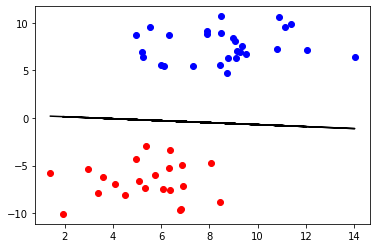

In [11]:
# Visualize model
w_1 = linear_svm.coef_[0, 0]
w_2 = linear_svm.coef_[0, 1]
w_0 = linear_svm.intercept_[0]

discriminator = -(w_1/w_2)*test_features[:, 0] - (w_0/w_2)

test_ClassA = test_targets == -1
plt.scatter(test_features[test_ClassA, 0],
            test_features[test_ClassA, 1], color="red")

test_ClassB = test_targets == 1
plt.scatter(test_features[test_ClassB, 0],
            test_features[test_ClassB, 1], color="blue")

plt.plot(test_features[:, 0], discriminator, color="black")
plt.plot()


# Breast Cancer Data

In [12]:
# Load data
original_data = pd.read_csv("data/breast_cancer.csv", sep=',')
original_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Clean data
diagnosis_map = {'M': 1, 'B': - 1}
original_data["diagnosis"] = original_data["diagnosis"].map(diagnosis_map)
original_data.drop(original_data.columns[[-1, 0]], axis=1,  inplace=True)
original_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Split into features and targets and normalize
Y = original_data.loc[:, "diagnosis"]
X = original_data.iloc[:, 1:]

X_normalized = (X - X.min())/(X.max() - X.min())
X_norm_copy = X_normalized.copy()
X_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## From Scratch Implementation

In [15]:
# Train/test split
X_normalized.insert(loc=len(X_norm_copy.columns),
                    column="intercept", value=1)  # add bias to features

train_features, train_targets, test_features, test_targets = split_data.train_test_split(
    X_norm_copy.values.T, Y.values.reshape((1, Y.shape[0])))


In [16]:
# Train model
svm_model = svm.SVM(train_features.shape[0])
svm_model.fit(train_features, train_targets)


| epoch 1 | loss 5662.295729274535
| epoch 2 | loss 4822.414120522278
| epoch 4 | loss 4197.711667808363
| epoch 8 | loss 3502.3427582212094
| epoch 16 | loss 3009.0556860916427
| epoch 32 | loss 2467.468005128708
| epoch 64 | loss 1952.5582127023795
| epoch 128 | loss 1589.2880622601217
| epoch 256 | loss 1346.2284097933614
| epoch 512 | loss 1239.6275586105394
| epoch 1024 | loss 1179.713417141464
| epoch 2048 | loss 1152.0564300662634
| epoch 4096 | loss 1159.365498416956


In [17]:
# Test model
predictions = svm_model.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[1] * 100 :2.3f}%")


Accuray = 96.491%


## Sklearn Implementation

In [18]:
# Train-test split
train_features, test_features, train_targets, test_targets = train_test_split(
    X_normalized.values, Y)


In [19]:
# Train model
linear_svm = LinearSVC(loss="hinge", max_iter=5000)
linear_svm.fit(train_features, train_targets, )


LinearSVC(loss='hinge', max_iter=5000)

In [20]:
# Test model
predictions = linear_svm.predict(test_features)
print(
    f"Accuray = {np.sum(predictions == test_targets)/predictions.shape[0] * 100 :2.3f}%")


Accuray = 97.902%
